In [2]:
# data => https://www.kaggle.com/mohansacharya/graduate-admissions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df1 = pd.read_csv('Admission_Predict.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [38]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
list(df.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [48]:
df.columns = df.columns.str.strip()

In [50]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [42]:
def convert(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [46]:
convert(0.3)

0

In [56]:
df['Chance of Admit'] = df['Chance of Admit'].apply(convert)

In [58]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


In [60]:
# separate input and output

x = df.drop(['Serial No.', 'Chance of Admit'], axis = 1)
y = df['Chance of Admit']

In [62]:
x.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


#### feature scaling

In [84]:
# resample

from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [86]:
x_res, y_res = sm.fit_resample(x, y)

In [90]:
y_res.value_counts()

Chance of Admit
1    463
0    463
Name: count, dtype: int64

In [92]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
x_scaled = sca.fit_transform(x_res)

#### cross validation

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res,
                                                   random_state=0,
                                                   stratify= y_res)

### build the model

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluate

In [102]:
y_pred = dt.predict(x_test)

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

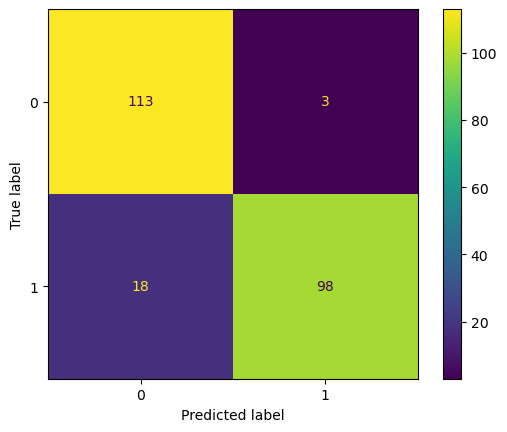

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       116
           1       0.97      0.84      0.90       116

    accuracy                           0.91       232
   macro avg       0.92      0.91      0.91       232
weighted avg       0.92      0.91      0.91       232



In [110]:
accuracy_score(y_test, y_pred)

0.9094827586206896